# Sampling Distributions

* **Relative Error -** % difference between point estimate and population parameter
* ...

<br>

<br>

<br>

### Dataset

* **Attrition Dataset -** HR data relating to an emplyee's length of service

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'attrition.feather'
df = pd.read_feather(file)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


<br>

<br>

<br>

### Relative error

* % difference between point estimate and population parameter
* Relative error value ≈ 0 indicates good sample
* Means there is little difference between using the sample and the whole population

<br>

$
Relative Error = \frac{Abs(Population Parameter - Point Estimate)}{Population Paramter}\ * 100
$

In [2]:
# srs
df_srs = df.sample(n=100, random_state=1001)

# relative error
pop_param = df.Attrition.mean()
point_est = df_srs.Attrition.mean()
rel_error = abs(pop_param - point_est) / pop_param * 100

# show
print('Population Parameter = ' + str(pop_param))
print('Point Estimate = ' + str(point_est))
print('Relative Error = ' + str(rel_error) + '%')

Population Parameter = 0.16122448979591836
Point Estimate = 0.15
Relative Error = 6.962025316455694%


In [13]:
# init lists
list_sample_size = []
list_pop_param = []
list_point_est = []
list_rel_error = []

# function
def srs(df, n):

    # srs
    df_srs = df.sample(n=n, random_state=1002)
    
    # relative error
    pop_param = df.Attrition.mean()
    point_est = df_srs.Attrition.mean()
    rel_error = abs(pop_param - point_est) / pop_param * 100

    list_sample_size.append(n)
    list_pop_param.append(pop_param)
    list_point_est.append(point_est)
    list_rel_error.append(rel_error)

# params
file = 'attrition.feather'
df = pd.read_feather(file)
max_sample = len(df.index)

# loop through all sample sizes
for n in range(1, max_sample+1):
    srs(df, n)

# df
df_rel_error_analysis = pd.DataFrame(
    {'sample_size':list_sample_size,
     'population_paramter':list_pop_param,
     'point_estimate':list_point_est,
     'relative_error':list_rel_error}
     )

# show
df_rel_error_analysis

,sample_size,population_paramter,point_estimate,relative_error
0,1,0.161224,0.000000,100.000000
1,2,0.161224,0.000000,100.000000
2,3,0.161224,0.000000,100.000000
3,4,0.161224,0.250000,55.063291
4,5,0.161224,0.200000,24.050633
...,...,...,...,...
1465,1466,0.161224,0.160982,0.150241
1466,1467,0.161224,0.160873,0.218305
1467,1468,0.161224,0.160763,0.286276
1468,1469,0.161224,0.160654,0.354155


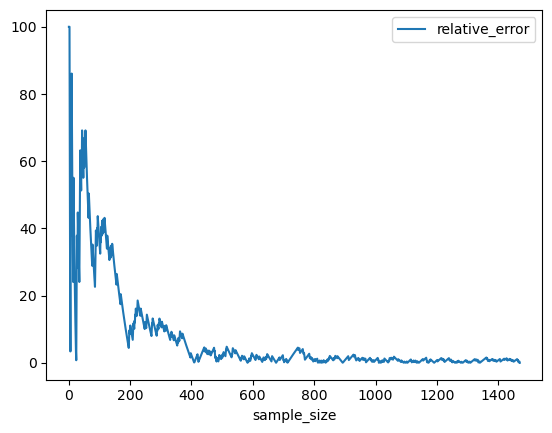

In [15]:
# relative error x sample size
df_rel_error_analysis.plot(kind='line', x='sample_size', y='relative_error')
plt.show()